In [1]:
# !pip install yfinance
# First you should install yfinance package in your system for historical market data from Yahoo! Finance
# !pip install matplotlib
# for graph plotting purposes 

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter 

In [2]:
BTC_USD=yf.download("BTC-USD", start='2020-01-01', end='2020-12-31', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
BTC_USD.head(6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,7294.438965,7335.290039,7169.777832,7193.599121,7193.599121,21167946112
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


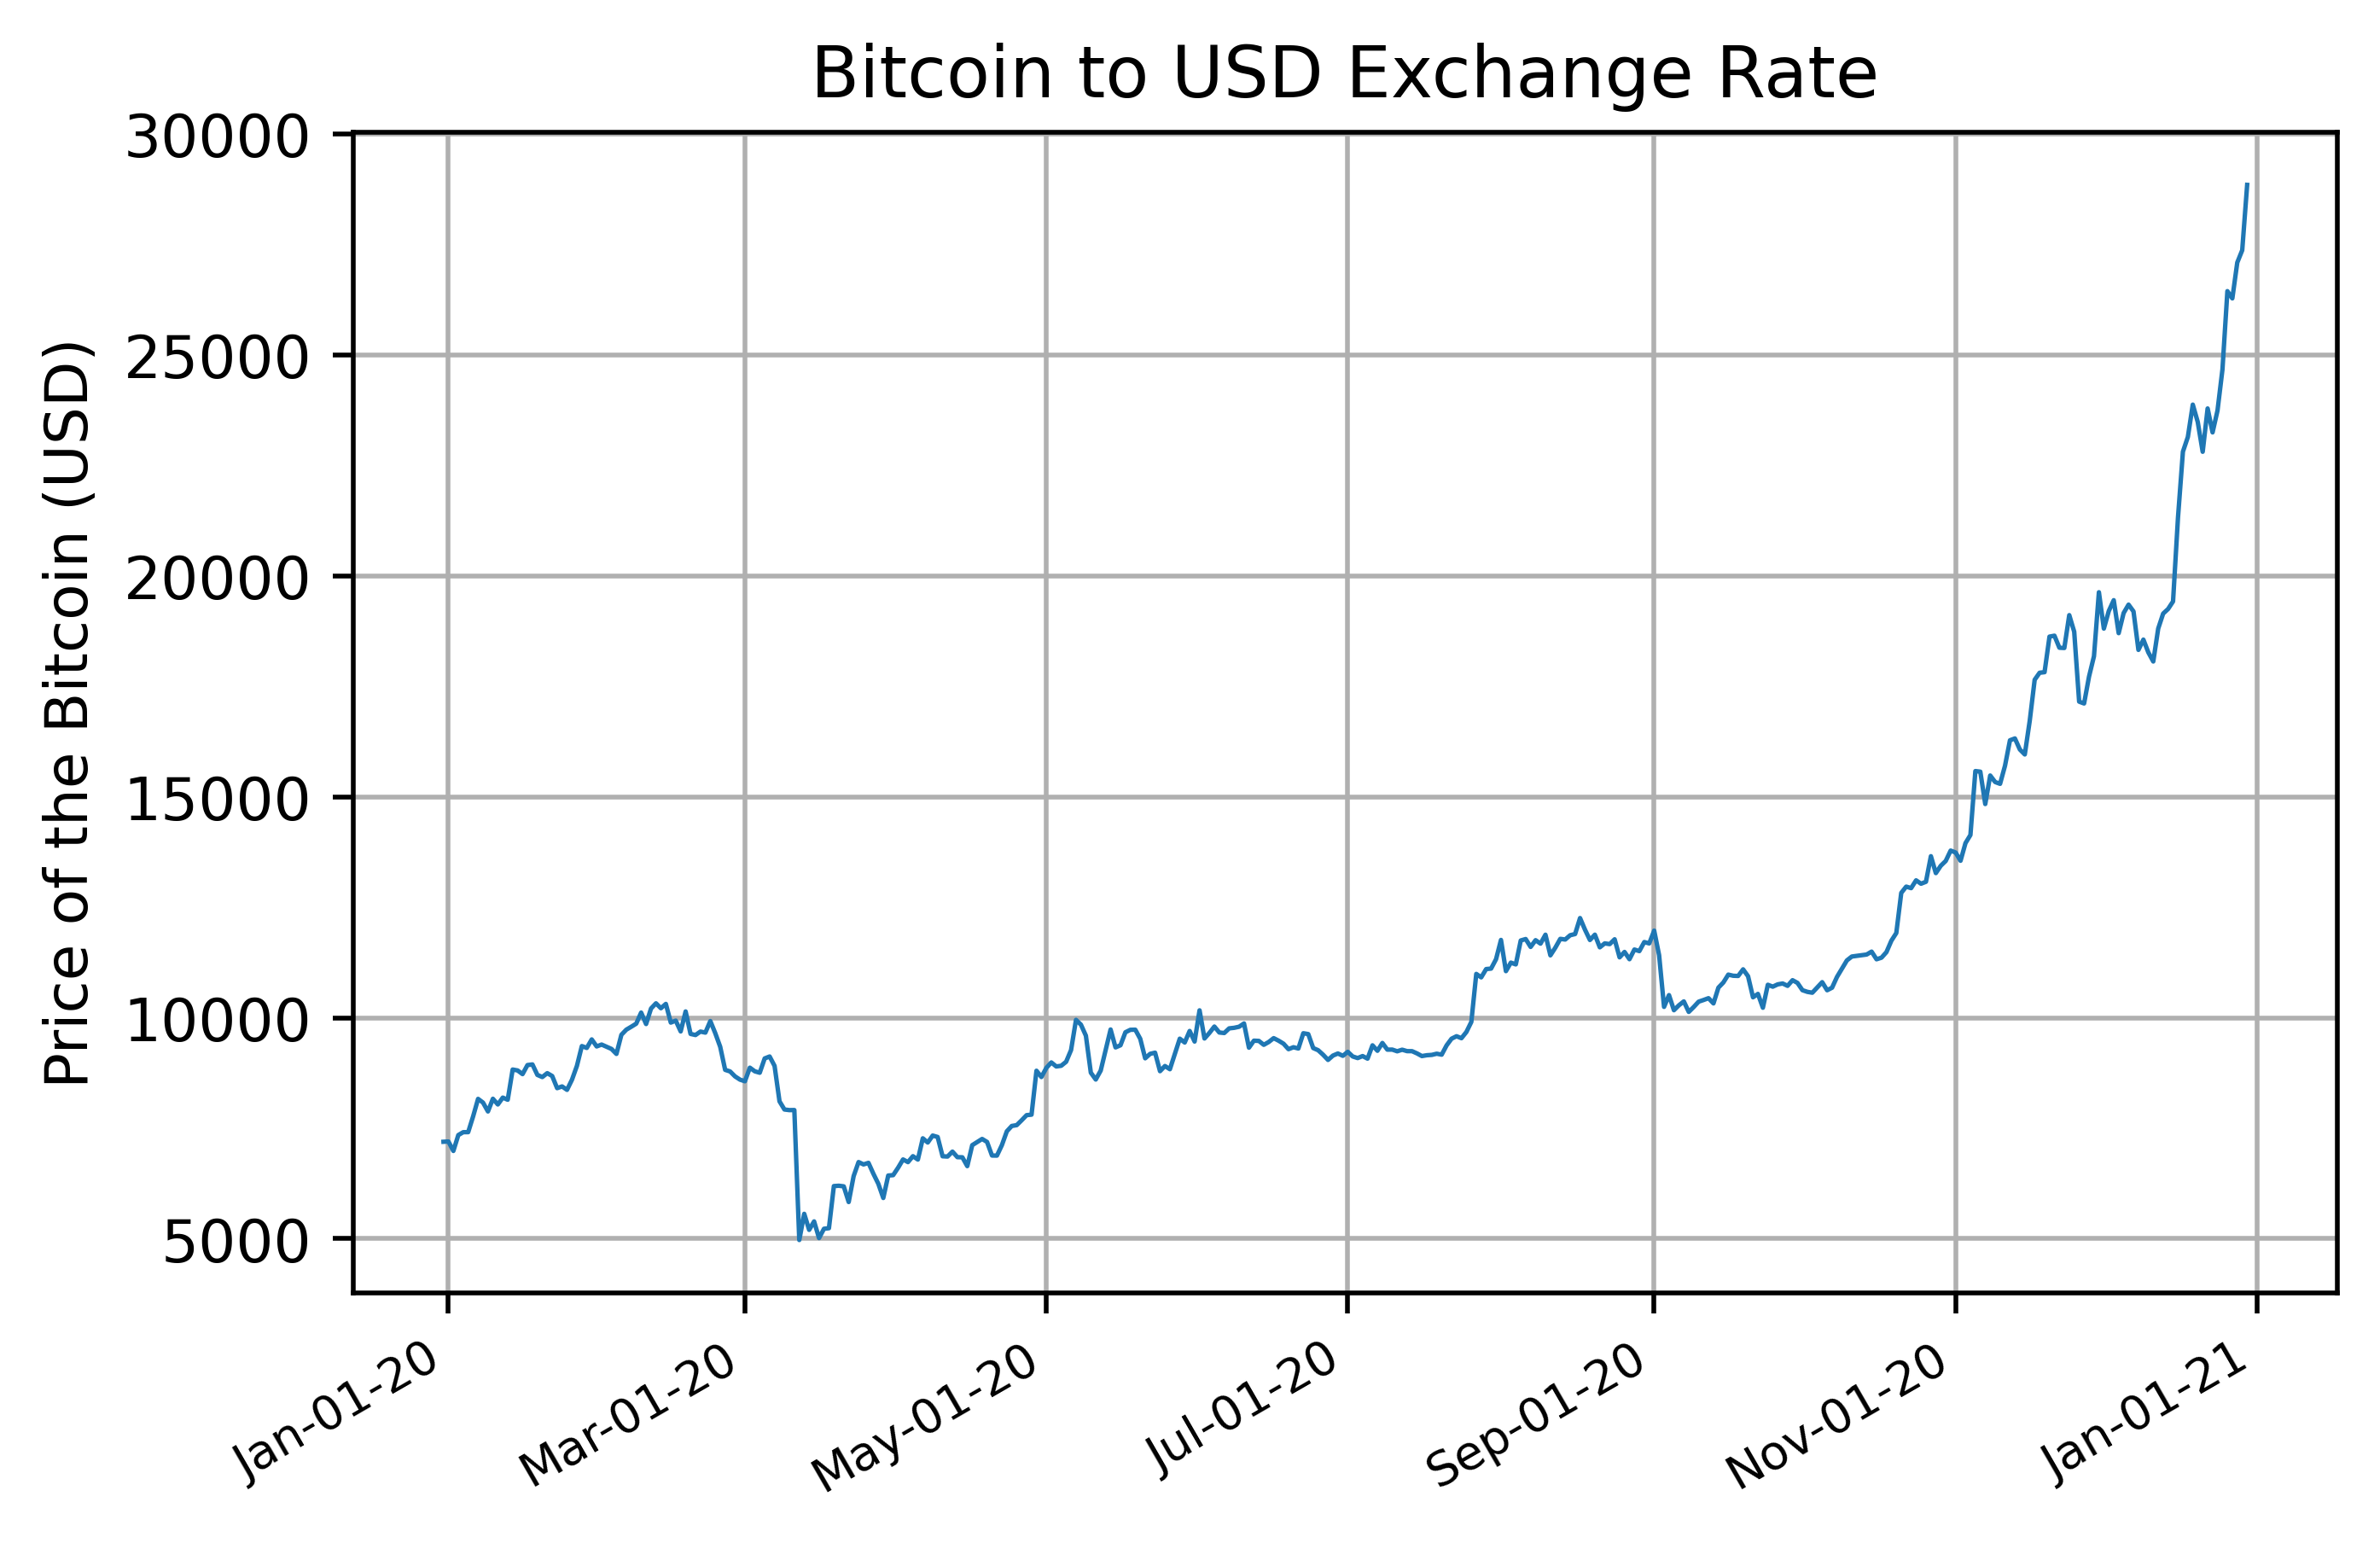

In [10]:
fig, ax = plt.subplots(dpi=500)

date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x',labelsize=8)
fig.autofmt_xdate()

ax.plot(BTC_USD['Close'], lw=0.75)

ax.set_ylabel('Price of the Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid()
plt.show()

In [11]:
# Simple Moving Average
BTC_USD['SMA_9'] = BTC_USD['Close'].rolling(window = 9, min_periods = 1).mean()

In [12]:
BTC_USD['SMA_30'] = BTC_USD['Close'].rolling(window=30, min_periods = 1).mean()

In [13]:
BTC_USD.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_30
Date,,,,,,,,
2020-12-26,24677.015625,26718.070312,24522.689453,26437.037109,26437.037109,48332647295,23905.591363,20518.139062
2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,66479895605,24253.850694,20823.602148
2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742893,24611.070312,21135.848633
2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,45265946774,25042.752821,21442.013737
2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,51287442704,25713.627387,21749.184310


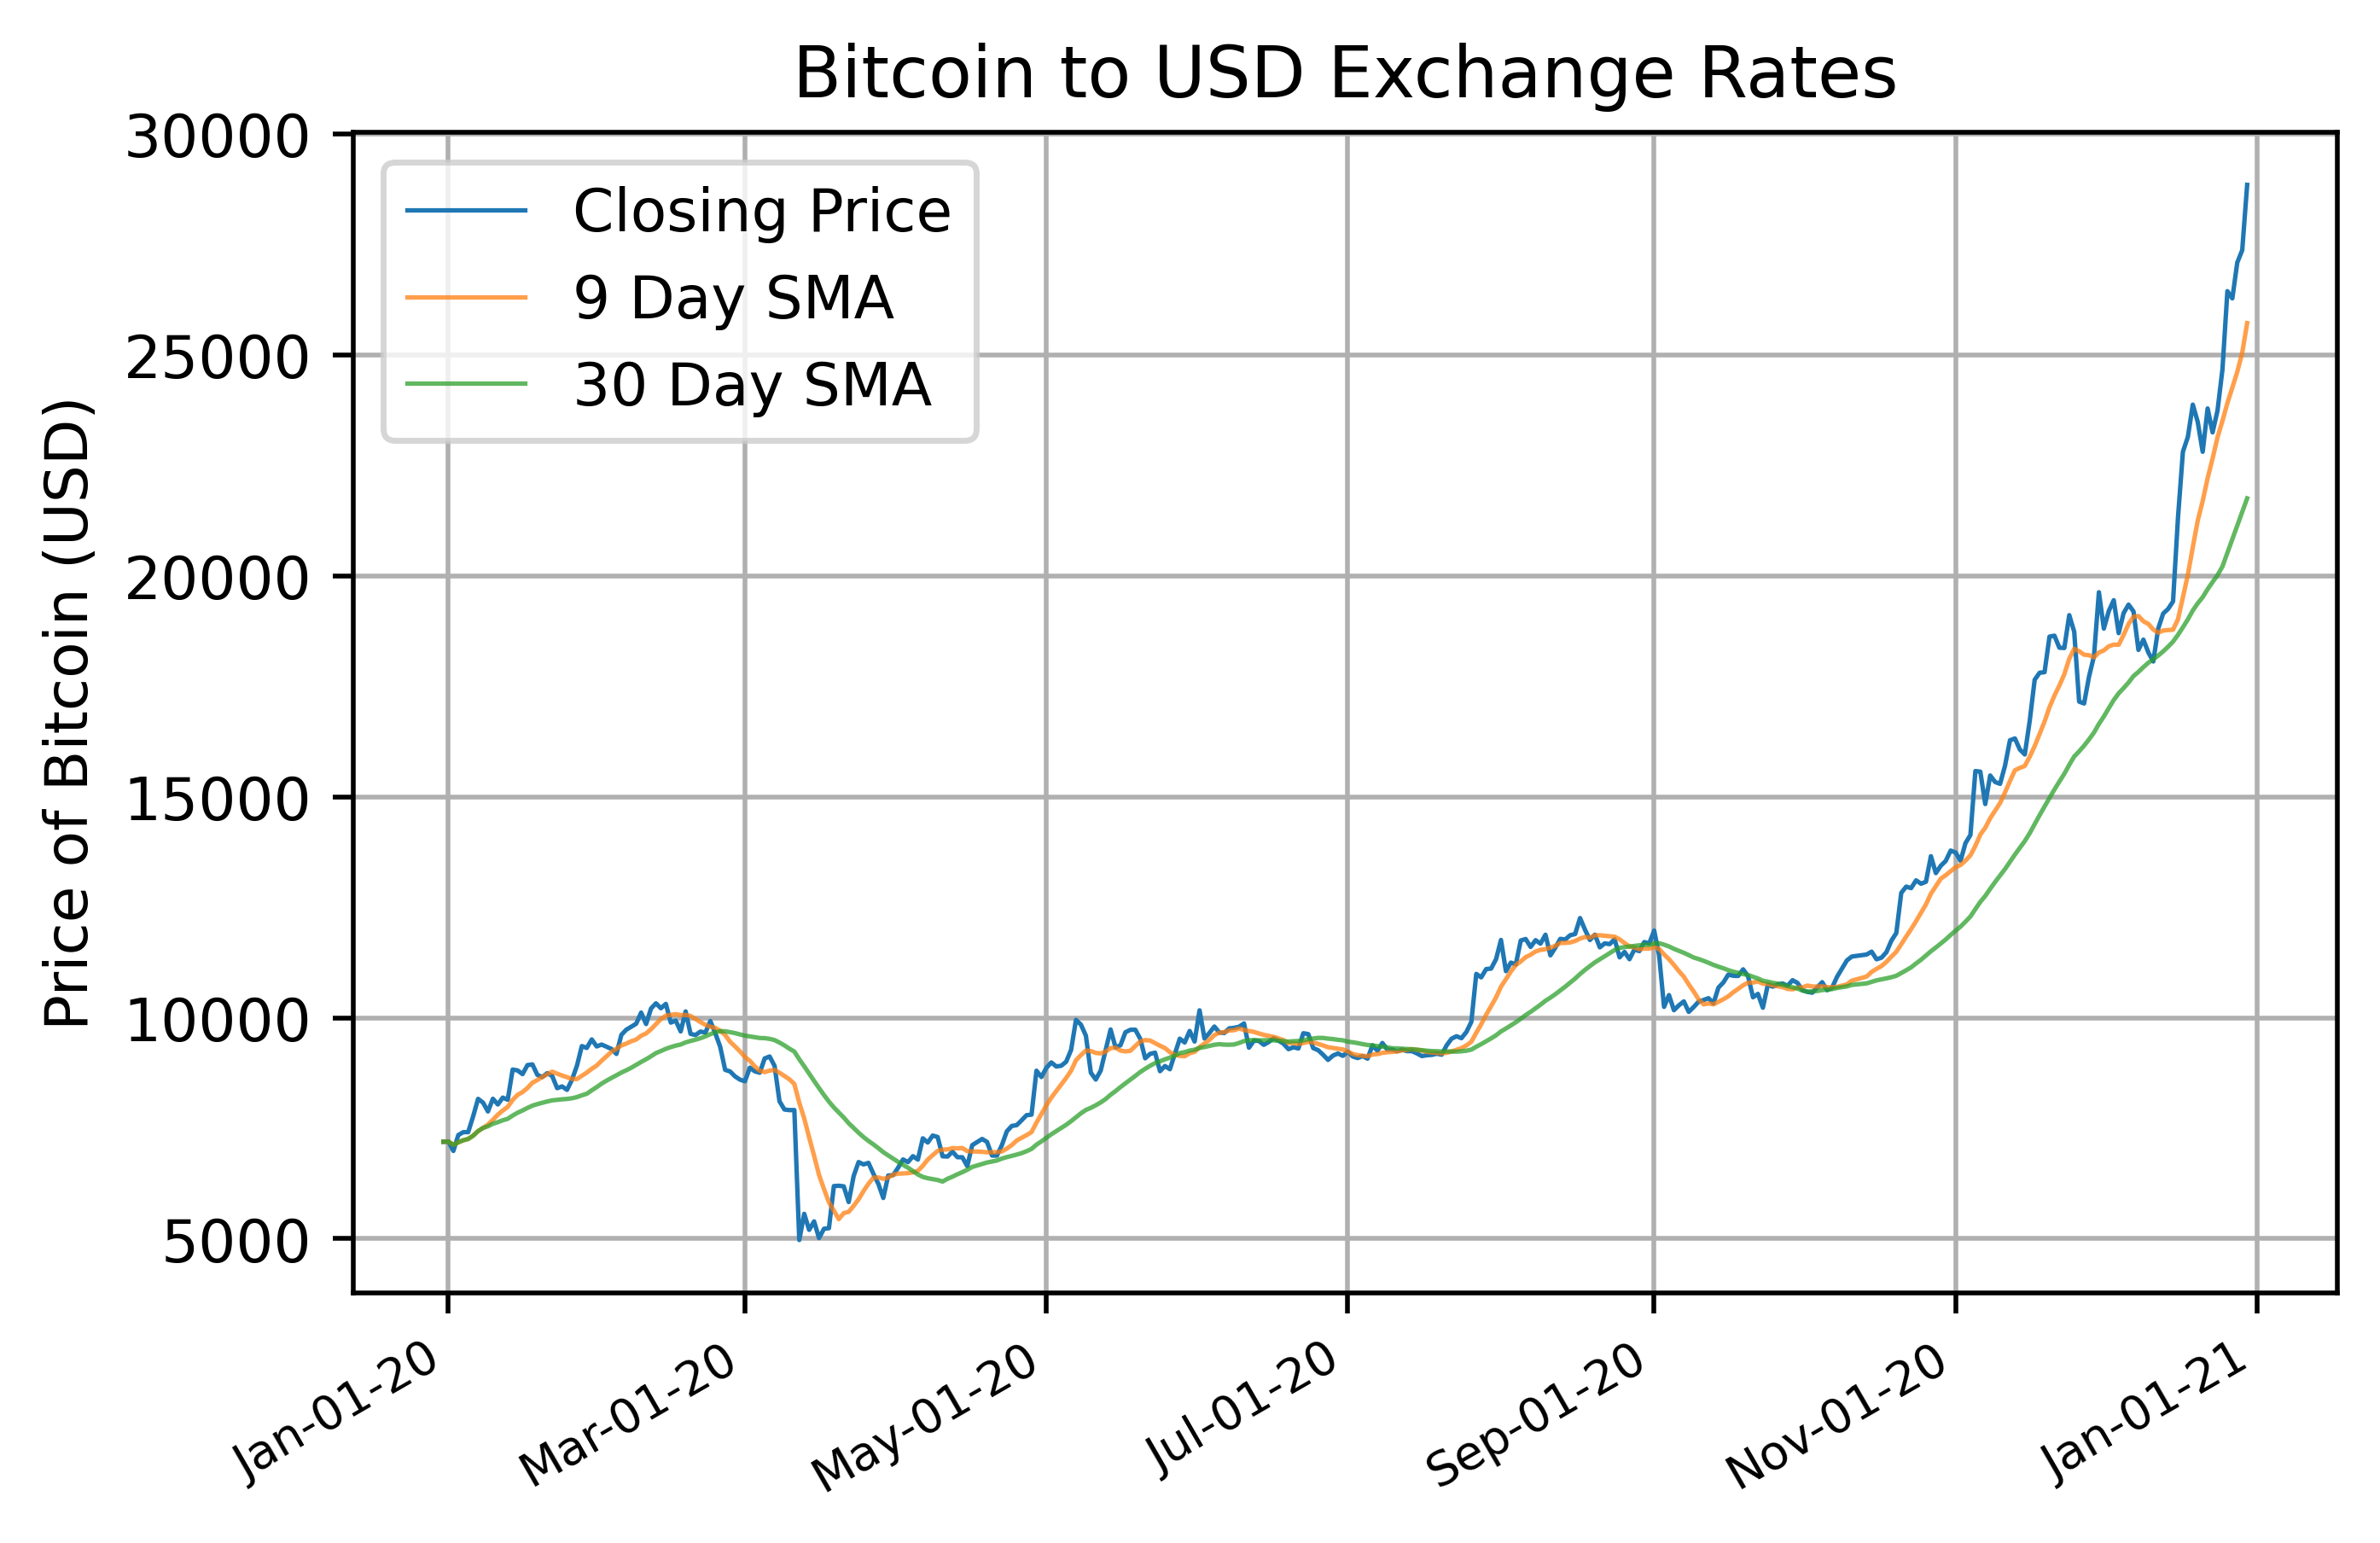

In [14]:
fig, ax = plt.subplots(dpi=500)

date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')
ax.plot(BTC_USD['SMA_9'], lw=0.75, alpha=0.75, label='9 Day SMA')
ax.plot(BTC_USD['SMA_30'], lw=0.75, alpha=0.75, label='30 Day SMA')

ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rates')
ax.grid()
ax.legend()

plt.show()

One of the simplest trading strategies making use of Simple Moving Averages is the Moving Average Crossover. The basic idea behind this strategy is to use two Simple Moving Averages - one with a relatively short sampling interval and the other with a longer interval. When the shorter moving average crosses over the longer interval moving average, it can signal a reversal in trend. For example, if the shorter term moving average is below the longer moving average but then crosses over to the top of it, this may signal the beginning of an upwards (bullish) trend. Using the Moving Average Crossover strategy, this would be a buy signal. Similarily, when the shorter moving average is above the longer interval one and it crosses under, this could signal a downward (bearish) trend, which would be a sell signal in this strategy.`


The simplicity of this approach makes it an excellent first strategy to implement. Let's jump right into it and get to work on implementing an algorithm that does all that pesky thinking for us!

In [17]:
trade_signals = pd.DataFrame(index=BTC_USD.index)

short_interval = 10
long_interval = 40

trade_signals['Short'] = BTC_USD['Close'].rolling(window=short_interval,min_periods=1).mean()
trade_signals['Long'] = BTC_USD['Close'].rolling(window=long_interval,min_periods=1).mean()

In [18]:
trade_signals['Signal'] = 0.0

# Wherever the Shorter term SMA is above the Longer term SMA, set the Signal column to 1, otherwise 0
trade_signals['Signal'] = np.where(trade_signals['Short'] > trade_signals['Long'], 1.0, 0.0)

In [21]:
trade_signals['Position'] = trade_signals['Signal'].diff()

According to our Moving Average Crossover strategy, we want to buy when the short-term SMA crosses the long-term SMA from below, and sell when it crosses over from above. We can easily use the Signal column in the trade_signals dataframe to determine where exactly these events occur. If the Signal column has value 0.0 on a given date then switches to 1.0, this means the short-term SMA crossed the long-term SMA from below - this is our time to buy Bitcoin according to our strategy. On the other hand, if the value goes from 1.0 to 0.0, that tells us the short-term SMA was above the long-term SMA and then crossed over - this is our time to sell.

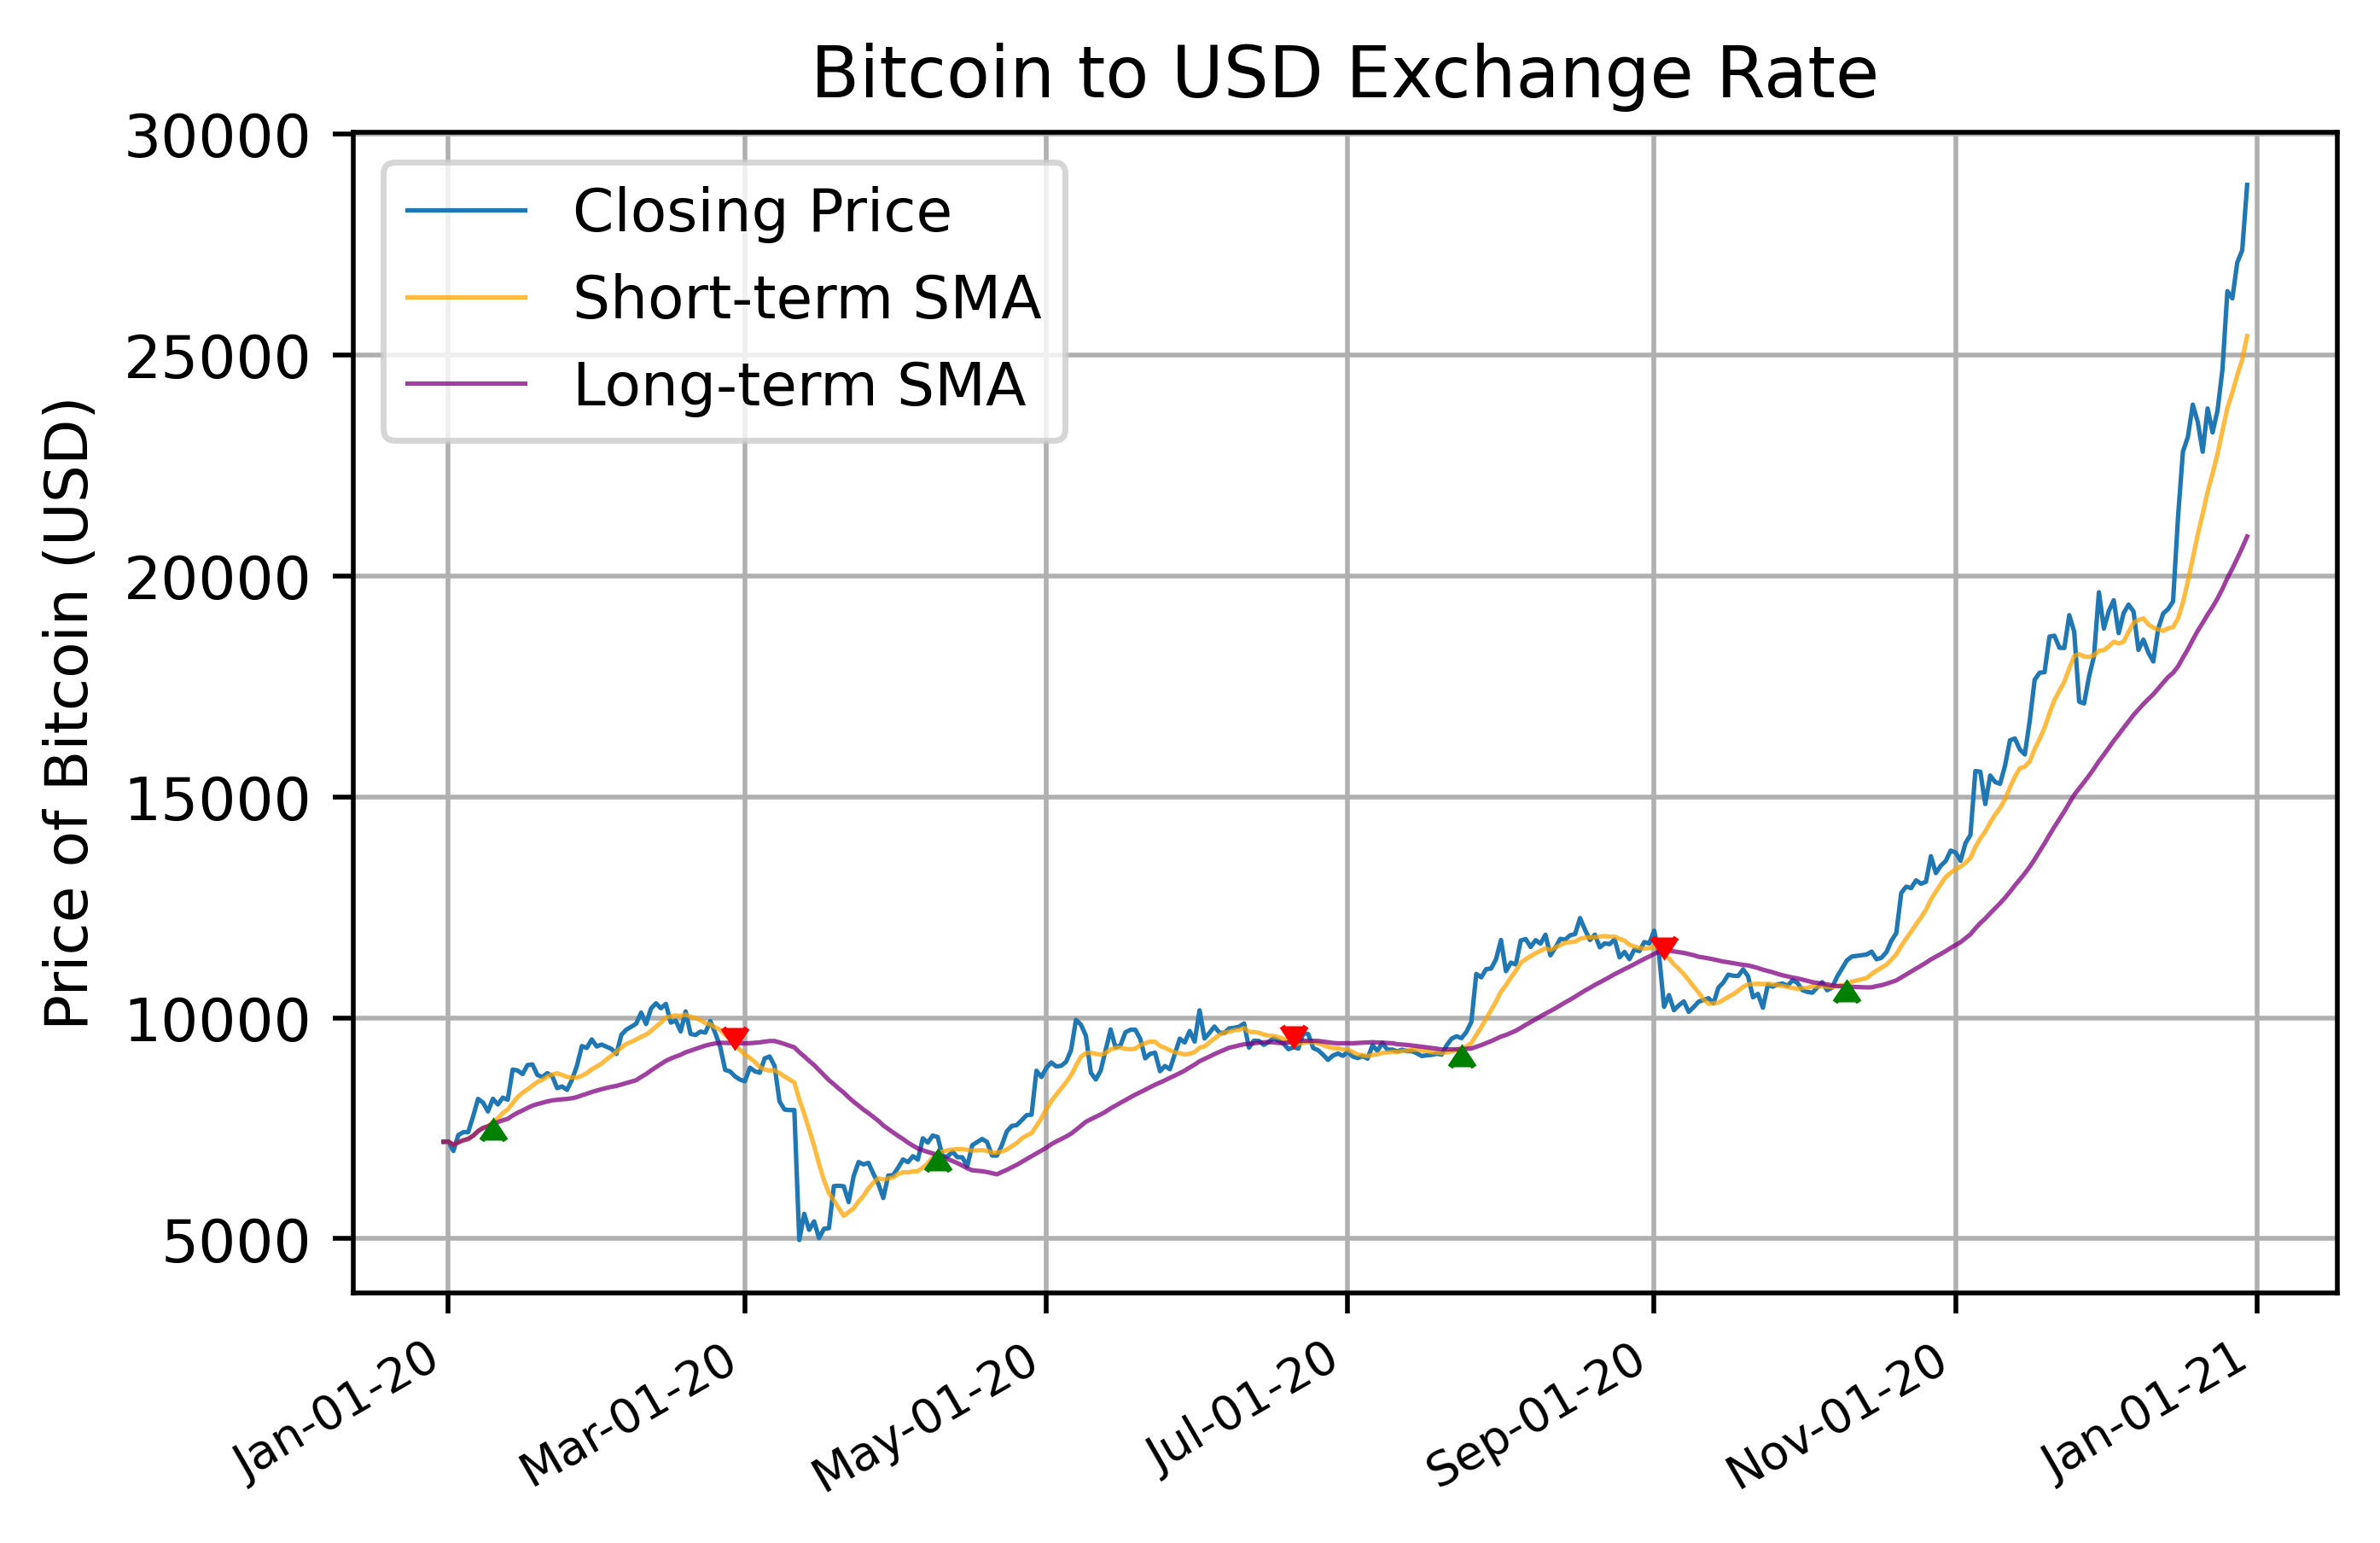

In [23]:
fig, ax = plt.subplots(dpi=500)

date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')
ax.plot(trade_signals['Short'], lw=0.75, alpha=0.75, color='orange', label='Short-term SMA')
ax.plot(trade_signals['Long'], lw=0.75, alpha=0.75, color='purple', label='Long-term SMA')

ax.plot(trade_signals.loc[trade_signals['Position']==1.0].index, trade_signals.Short[trade_signals['Position'] == 1.0],
 marker=6, ms=4, linestyle='none', color='green')

ax.plot(trade_signals.loc[trade_signals['Position']==-1.0].index, trade_signals.Short[trade_signals['Position'] == -1.0],
 marker=7, ms=4, linestyle='none', color='red')

ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid()
ax.legend() 

plt.show()

In [24]:
initial_balance = 10000.0
backtest = pd.DataFrame(index=trade_signals.index)
backtest['BTC_Return'] = BTC_USD['Close']/BTC_USD['Close'].shift(1)

In [25]:
backtest['Alg_Return'] = np.where(trade_signals.Signal == 1, backtest.BTC_Return, 1.0)

backtest['Balance'] = initial_balance * backtest.Alg_Return.cumprod()

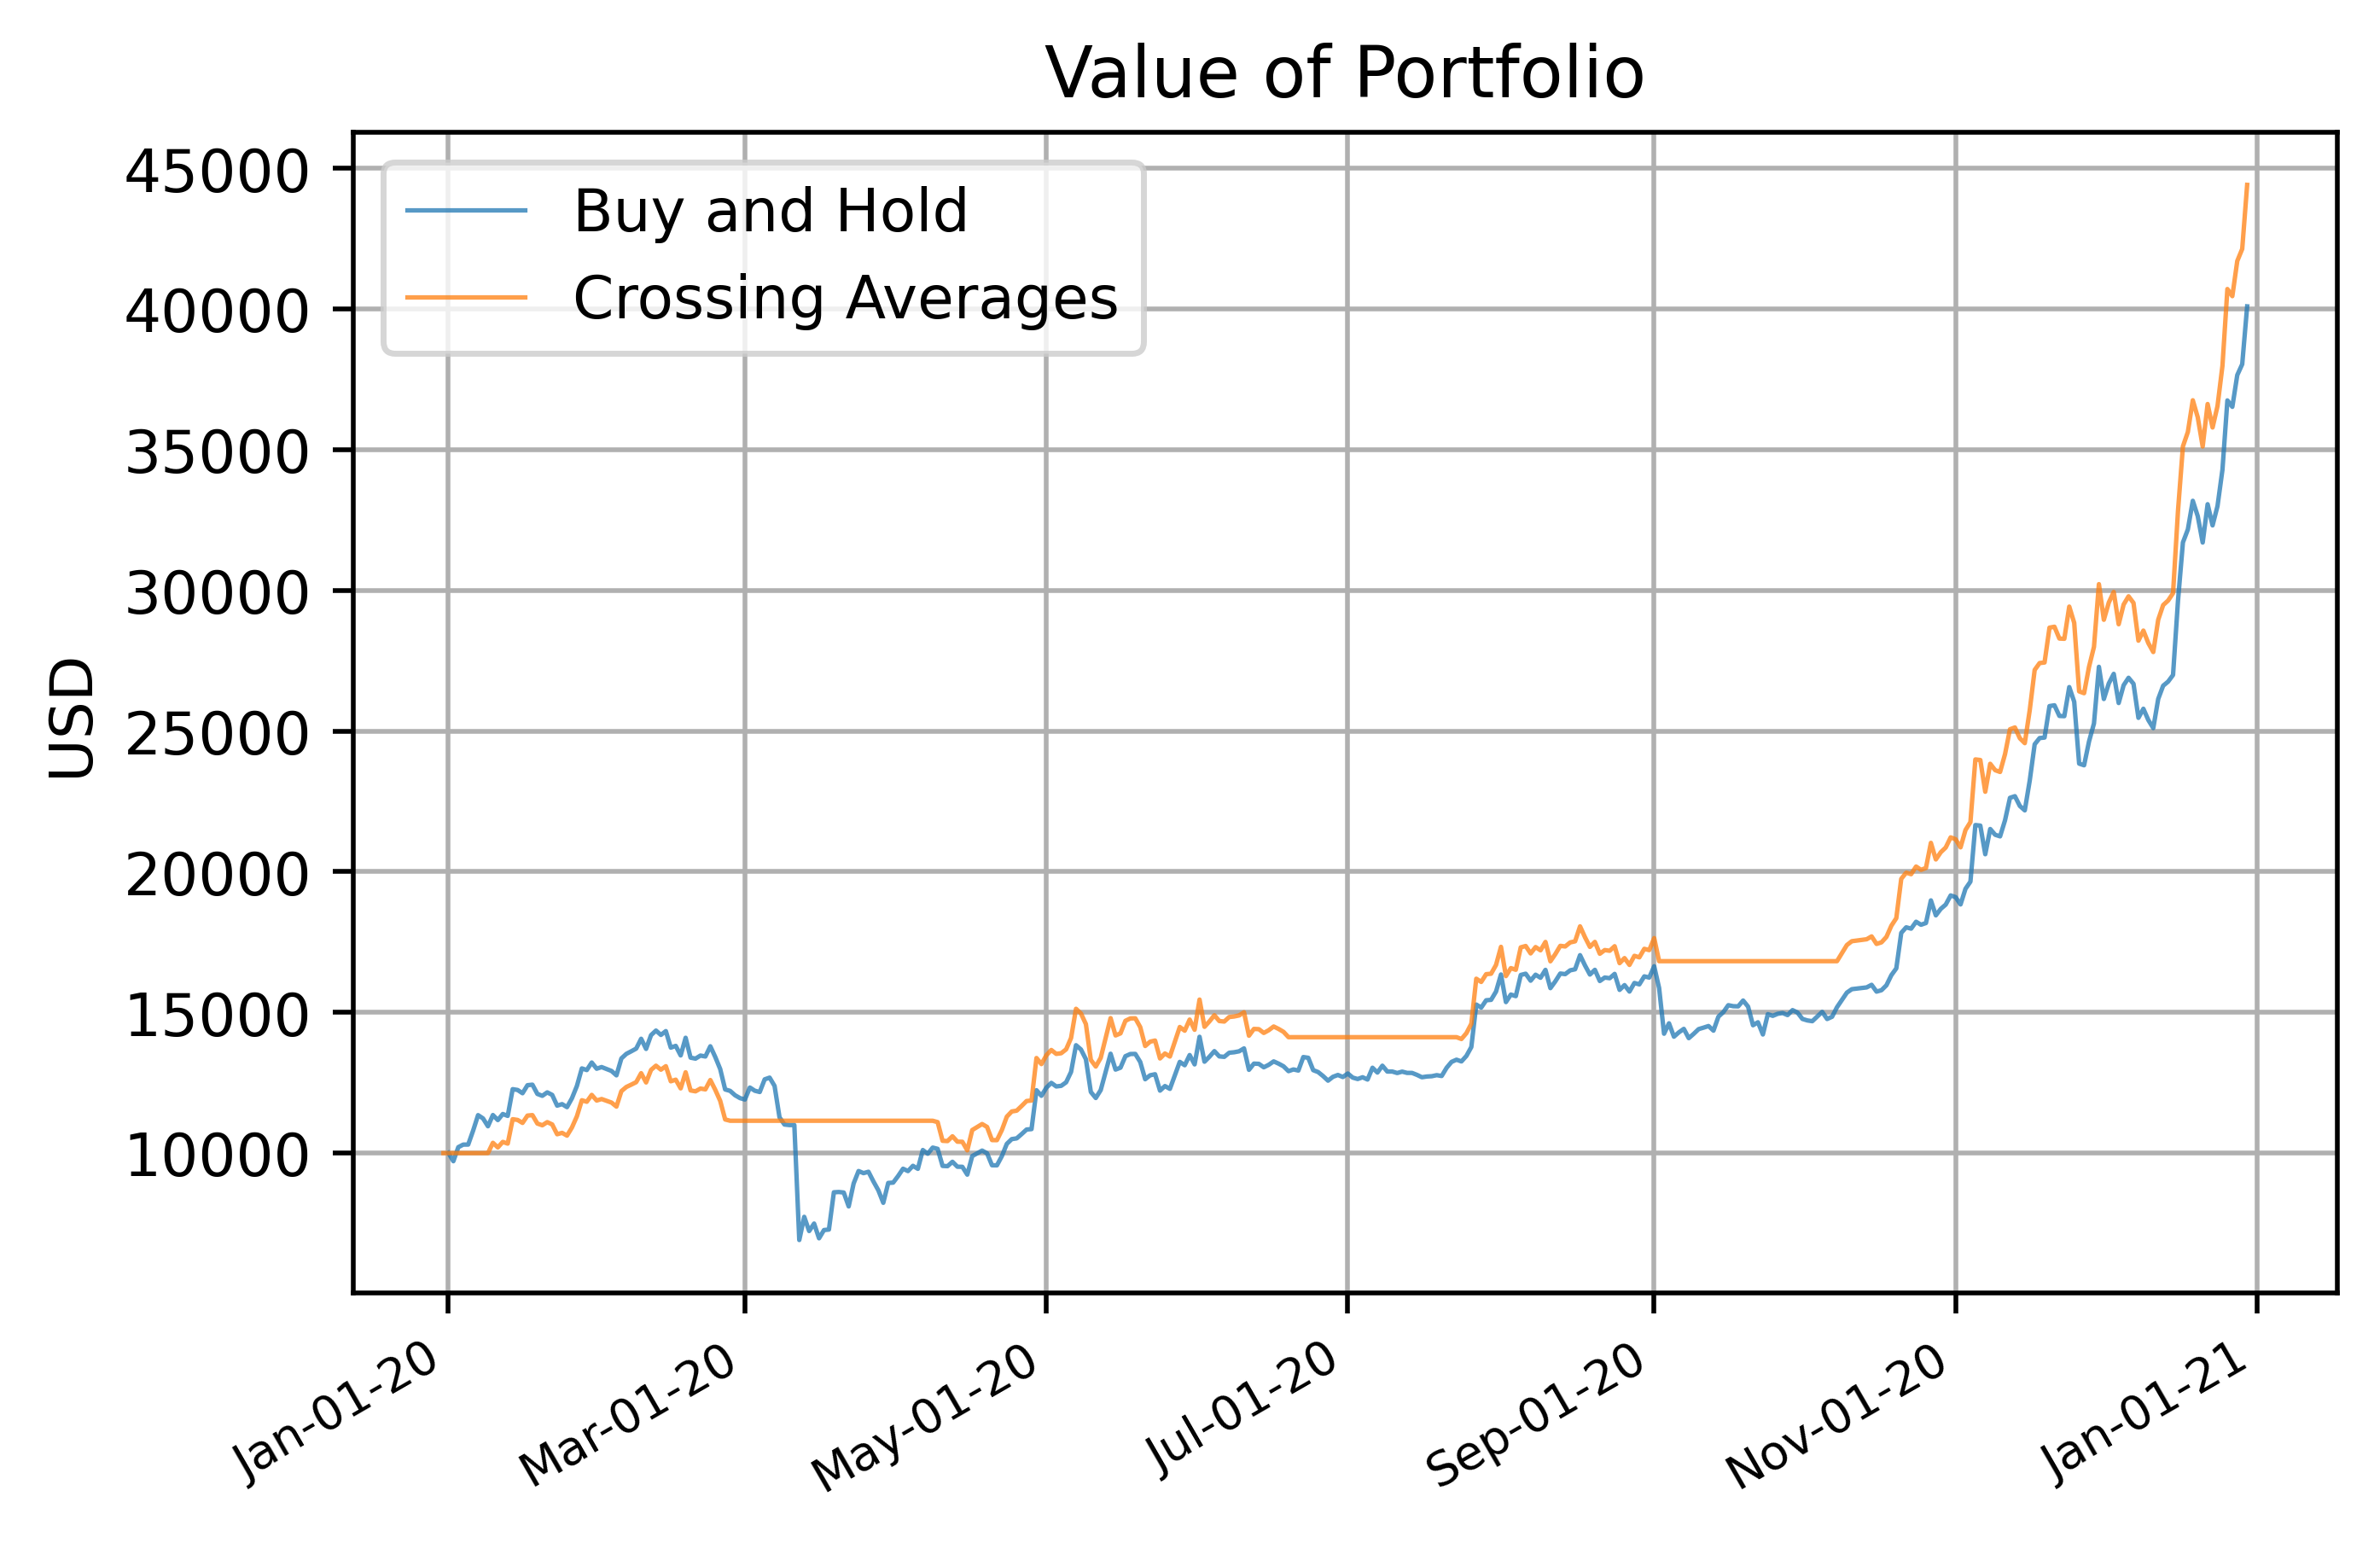

In [26]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the value of Buy and Hold Strategy
ax.plot(initial_balance*backtest.BTC_Return.cumprod(), lw=0.75, alpha=0.75, label='Buy and Hold')

# Plotting total value of Crossing Averages Strategy
ax.plot(backtest['Balance'], lw=0.75, alpha=0.75, label='Crossing Averages')

# Adding labels and title to the plot
ax.set_ylabel('USD')
ax.set_title('Value of Portfolio')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()